In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import numpy as np
import os
from PIL import Image
# 이미지 처리 
from keras.preprocessing import image

In [2]:
import cv2
from random import shuffle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob as gb
from tensorflow.keras.utils import to_categorical

## 파일 경로

In [3]:
base_dir = './Data' # 기본경로
train_dir = os.path.join(base_dir, 'train') # 학습 데이터 경로
test_dir = os.path.join(base_dir, 'test') # 테스트 데이더 경로
p_train_dir = os.path.join(base_dir, 'p_train') # 추가학습 데이터 경로  # 으로 다 합침
p_test_dir = os.path.join(base_dir, 'p_test') # 추가학습 데이터 경로  # 으로 다 합침


# 학습 사진
train_covid_dir = os.path.join(train_dir, 'COVID19')
train_normal_dir = os.path.join(train_dir, 'NORMAL')
train_pneum_dir = os.path.join(train_dir, 'PNEUMONIA')

# 추가 학습 사진
p_train_covid_dir = os.path.join(p_train_dir, 'COVID19')
p_train_normal_dir = os.path.join(p_train_dir, 'NORMAL')
p_train_pneum_dir = os.path.join(p_train_dir, 'PNEUMONIA')

# 테스트  사진
test_covid_dir = os.path.join(test_dir, 'COVID19')
test_normal_dir = os.path.join(test_dir, 'NORMAL')
test_pneum_dir = os.path.join(test_dir, 'PNEUMONIA')

# 추가 테스트 사진

p_test_covid_dir = os.path.join(p_test_dir, 'COVID19')
p_test_normal_dir = os.path.join(p_test_dir, 'NORMAL')
p_test_pneum_dir = os.path.join(p_test_dir, 'PNEUMONIA')

In [4]:
# 제대로 경로 지정 됐는지 확인
train_covid_fname = os.listdir(train_covid_dir)
train_normal_fname = os.listdir(train_normal_dir)
train_pneum_fname = os.listdir(train_pneum_dir)

test_covid_fname = os.listdir(test_covid_dir)
test_normal_fname = os.listdir(test_normal_dir)
test_pneum_fname = os.listdir(test_pneum_dir)

p_train_covid_fname = os.listdir(p_train_covid_dir)
p_train_normal_fname = os.listdir(p_train_normal_dir)
p_train_pneum_fname = os.listdir(p_train_pneum_dir)

p_test_covid_fname = os.listdir(p_test_covid_dir)
p_test_normal_fname = os.listdir(p_test_normal_dir)
p_test_pneum_fname = os.listdir(p_test_pneum_dir)

print(train_covid_fname[:10]) # 열개만 확인
print(train_normal_fname[:10])
print(p_train_normal_fname[:10])

['COVID19(0).jpg', 'COVID19(1).jpg', 'COVID19(10).jpg', 'COVID19(101).jpg', 'COVID19(102).jpg', 'COVID19(103).jpg', 'COVID19(104).jpg', 'COVID19(105).jpg', 'COVID19(107).jpg', 'COVID19(108).jpg']
['NORMAL(0).jpg', 'NORMAL(1).jpg', 'NORMAL(100).jpg', 'NORMAL(1000).jpg', 'NORMAL(1002).jpg', 'NORMAL(1005).jpg', 'NORMAL(1006).jpg', 'NORMAL(1007).jpg', 'NORMAL(1008).jpg', 'NORMAL(1009).jpg']
['NORMAL(0).jpg', 'NORMAL(1).jpg', 'NORMAL(100).jpg', 'NORMAL(1000).jpg', 'NORMAL(1002).jpg', 'NORMAL(1005).jpg', 'NORMAL(1006).jpg', 'NORMAL(1007).jpg', 'NORMAL(1008).jpg', 'NORMAL(1009).jpg']


In [5]:
# train 및 test 디렉토리에서 코로나, 정상, 폐렴의 이미지 총 수를 알아보기
print("전체 학습용 코로나 이미지 개수는: ", len(os.listdir(train_covid_dir)))
print("전체 학습용 정상 이미지 개수는: ", len(os.listdir(train_normal_dir)))
print("전체 학습용 폐렴 이미지 개수는: ", len(os.listdir(train_pneum_dir)))

print("-----------------------------------------------------")

print("전체 테스트용 코로나 이미지 개수는: ", len(os.listdir(test_covid_dir)))
print("전체 테스트용 정상 이미지 개수는: ", len(os.listdir(test_normal_dir)))
print("전체 테스트용 폐렴 이미지 개수는: ", len(os.listdir(test_pneum_dir)))

print("-----------------------------------------------------")
print("전체 추가 학습용 코로나 이미지 개수는: ", len(os.listdir(p_train_covid_dir)))
print("전체 추가 학습용 정상 이미지 개수는: ", len(os.listdir(p_train_normal_dir)))
print("전체 추가 학습용 폐렴 이미지 개수는: ", len(os.listdir(p_train_pneum_dir)))

print("-----------------------------------------------------")

print("전체 추가 테스트용 코로나 이미지 개수는: ", len(os.listdir(p_test_covid_dir)))
print("전체 추가 테스트용 정상 이미지 개수는: ", len(os.listdir(p_test_normal_dir)))
print("전체 추가 테스트용 폐렴 이미지 개수는: ", len(os.listdir(p_test_pneum_dir)))



전체 학습용 코로나 이미지 개수는:  460
전체 학습용 정상 이미지 개수는:  1266
전체 학습용 폐렴 이미지 개수는:  3418
-----------------------------------------------------
전체 테스트용 코로나 이미지 개수는:  116
전체 테스트용 정상 이미지 개수는:  317
전체 테스트용 폐렴 이미지 개수는:  855
-----------------------------------------------------
전체 추가 학습용 코로나 이미지 개수는:  6857
전체 추가 학습용 정상 이미지 개수는:  7644
전체 추가 학습용 폐렴 이미지 개수는:  9788
-----------------------------------------------------
전체 추가 테스트용 코로나 이미지 개수는:  2423
전체 추가 테스트용 정상 이미지 개수는:  2565
전체 추가 테스트용 폐렴 이미지 개수는:  3099


In [6]:
Labels = {'NORMAL':0,'PNEUMONIA':1,'COVID19':2}

def getCode(label):
    return Labels[label]

def getLabel(n):
    for x,c in Labels.items():
        if n==c:
            return x
        
print(getCode('COVID19'))
print(getLabel(1))

2
PNEUMONIA


In [7]:
import glob as gb
import cv2
import random

sizeImage = 224

def train_getData(Dir,sizeImage):
    X=[]
    y=[]
    for folder in os.listdir(Dir) :
        files = gb.glob(pathname = str(Dir + '/' + folder + '//*.jpg'))
        random.shuffle(files)
        for num in range(5000) :
            picture = cv2.imread(files[num])
            imageArray = cv2.resize(picture,(sizeImage,sizeImage))
            img = cv2.GaussianBlur(imageArray,(5,5),0)
            X.append(list(img))
            y.append(getCode(folder))
    X = np.array(X)
    y = np.array(y)
    
    return X,y

def test_getData(Dir,sizeImage):
    X=[]
    y=[]
    for folder in os.listdir(Dir) :
        files = gb.glob(pathname = str(Dir + '/' + folder + '//*.jpg'))
        random.shuffle(files)
        for num in range(1250) :
            picture = cv2.imread(files[num])
            imageArray = cv2.resize(picture,(sizeImage,sizeImage))
            img = cv2.GaussianBlur(imageArray,(5,5),0)
            X.append(list(img))
            y.append(getCode(folder))
    X = np.array(X)
    y = np.array(y)
    
    return X,y

In [8]:
X_train, y_train = train_getData(p_train_dir,sizeImage)
X_test,y_test = test_getData(p_test_dir,sizeImage)

## 데이터 셔플

In [9]:
tmp_train = [[x,y] for x, y in zip(X_train, y_train)]
tmp_test = [[x,y] for x, y in zip(X_test, y_test)]

import random
random.shuffle(tmp_train)
random.shuffle(tmp_test)

X_train = [n[0] for n in tmp_train]
y_train = [n[1] for n in tmp_train]

X_test = [n[0] for n in tmp_test]
y_test = [n[1] for n in tmp_test]

# 리스트에서 배열로
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [10]:
print("X_train Shape : ",X_train.shape)
print("X_test Shape : ",X_test.shape)

X_train Shape :  (15000, 224, 224, 3)
X_test Shape :  (3750, 224, 224, 3)


In [3]:
X_train = X_train / 255.0
X_test = X_test / 255.0


NameError: name 'X_train' is not defined

In [11]:
print(1)

1


In [12]:
from tensorflow.keras.applications.densenet import DenseNet201
pre_trained_model = DenseNet201(input_shape = (sizeImage,sizeImage,3), include_top = False,  weights='imagenet')
for layer in pre_trained_model.layers :
    layer.trainable = False
pre_trained_model.summary()

Model: "densenet201"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [13]:
from tensorflow.keras import Model

x = tf.keras.layers.GlobalAveragePooling2D()(pre_trained_model.output)
model_output = tf.keras.layers.Dense(3 , activation='softmax')(x)
#x = tf.keras.layers.Flatten()(pre_trained_model.output)

model = Model( pre_trained_model.input, model_output, name = 'densenet_type') 

print(model.summary())
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy",metrics=['accuracy'])

Model: "densenet_type"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
______________________________________________________________________________________

In [14]:
from tensorflow.keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, min_lr=0.0001, patience=1, verbose=1)

filepath="./checkpoint/checkpoint-epoch.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=30, validation_split=0.2, callbacks = [tf.keras.callbacks.EarlyStopping(patience = 5, monitor='val_loss')])

Epoch 1/30
 50/375 [===>..........................] - ETA: 58s - loss: 0.7800 - accuracy: 0.6719

In [19]:
history = model.fit(X_train, y_train,
                    epochs=300, validation_split=0.2, callbacks=[lr_reduce,checkpoint])

Epoch 1/300
375/375 [==============================] - ETA: 0s - loss: 0.0992 - accuracy: 0.9671
Epoch 00001: val_accuracy did not improve from 0.95800
375/375 [==============================] - 86s 230ms/step - loss: 0.0992 - accuracy: 0.9671 - val_loss: 0.1210 - val_accuracy: 0.9560
Epoch 2/300
375/375 [==============================] - ETA: 0s - loss: 0.0989 - accuracy: 0.9656
Epoch 00002: val_accuracy did not improve from 0.95800
375/375 [==============================] - 90s 239ms/step - loss: 0.0989 - accuracy: 0.9656 - val_loss: 0.1200 - val_accuracy: 0.9557
Epoch 3/300
375/375 [==============================] - ETA: 0s - loss: 0.0983 - accuracy: 0.9668
Epoch 00003: val_accuracy improved from 0.95800 to 0.95867, saving model to ./checkpoint\checkpoint-epoch.hdf5
375/375 [==============================] - 91s 244ms/step - loss: 0.0983 - accuracy: 0.9668 - val_loss: 0.1202 - val_accuracy: 0.9587
Epoch 4/300
375/375 [==============================] - ETA: 0s - loss: 0.0977 - accura

Epoch 57/300
375/375 [==============================] - ETA: 0s - loss: 0.0810 - accuracy: 0.9737
Epoch 00057: val_accuracy did not improve from 0.95900
375/375 [==============================] - 92s 246ms/step - loss: 0.0810 - accuracy: 0.9737 - val_loss: 0.1094 - val_accuracy: 0.9587
Epoch 58/300
375/375 [==============================] - ETA: 0s - loss: 0.0811 - accuracy: 0.9732
Epoch 00058: val_accuracy did not improve from 0.95900
375/375 [==============================] - 93s 248ms/step - loss: 0.0811 - accuracy: 0.9732 - val_loss: 0.1109 - val_accuracy: 0.9590
Epoch 59/300
375/375 [==============================] - ETA: 0s - loss: 0.0803 - accuracy: 0.9740
Epoch 00059: val_accuracy did not improve from 0.95900
375/375 [==============================] - 93s 248ms/step - loss: 0.0803 - accuracy: 0.9740 - val_loss: 0.1095 - val_accuracy: 0.9587
Epoch 60/300
375/375 [==============================] - ETA: 0s - loss: 0.0803 - accuracy: 0.9732
Epoch 00060: val_accuracy did not improve

375/375 [==============================] - ETA: 0s - loss: 0.0711 - accuracy: 0.9760
Epoch 00113: val_accuracy did not improve from 0.96100
375/375 [==============================] - 92s 246ms/step - loss: 0.0711 - accuracy: 0.9760 - val_loss: 0.1047 - val_accuracy: 0.9600
Epoch 114/300
375/375 [==============================] - ETA: 0s - loss: 0.0711 - accuracy: 0.9761
Epoch 00114: val_accuracy did not improve from 0.96100
375/375 [==============================] - 92s 246ms/step - loss: 0.0711 - accuracy: 0.9761 - val_loss: 0.1045 - val_accuracy: 0.9593
Epoch 115/300
375/375 [==============================] - ETA: 0s - loss: 0.0717 - accuracy: 0.9763
Epoch 00115: val_accuracy did not improve from 0.96100
375/375 [==============================] - 92s 246ms/step - loss: 0.0717 - accuracy: 0.9763 - val_loss: 0.1034 - val_accuracy: 0.9587
Epoch 116/300
375/375 [==============================] - ETA: 0s - loss: 0.0713 - accuracy: 0.9775
Epoch 00116: val_accuracy did not improve from 0.96

Epoch 142/300
375/375 [==============================] - ETA: 0s - loss: 0.0682 - accuracy: 0.9783
Epoch 00142: val_accuracy did not improve from 0.96100
375/375 [==============================] - 92s 246ms/step - loss: 0.0682 - accuracy: 0.9783 - val_loss: 0.1030 - val_accuracy: 0.9567
Epoch 143/300
375/375 [==============================] - ETA: 0s - loss: 0.0679 - accuracy: 0.9783
Epoch 00143: val_accuracy did not improve from 0.96100
375/375 [==============================] - 92s 246ms/step - loss: 0.0679 - accuracy: 0.9783 - val_loss: 0.1039 - val_accuracy: 0.9563
Epoch 144/300
375/375 [==============================] - ETA: 0s - loss: 0.0679 - accuracy: 0.9786
Epoch 00144: val_accuracy did not improve from 0.96100
375/375 [==============================] - 92s 246ms/step - loss: 0.0679 - accuracy: 0.9786 - val_loss: 0.1036 - val_accuracy: 0.9590
Epoch 145/300
375/375 [==============================] - ETA: 0s - loss: 0.0676 - accuracy: 0.9787
Epoch 00145: val_accuracy did not imp

Epoch 199/300
375/375 [==============================] - ETA: 0s - loss: 0.0627 - accuracy: 0.9801
Epoch 00199: val_accuracy did not improve from 0.96233
375/375 [==============================] - 92s 246ms/step - loss: 0.0627 - accuracy: 0.9801 - val_loss: 0.1011 - val_accuracy: 0.9577
Epoch 200/300
375/375 [==============================] - ETA: 0s - loss: 0.0625 - accuracy: 0.9803
Epoch 00200: val_accuracy did not improve from 0.96233
375/375 [==============================] - 92s 246ms/step - loss: 0.0625 - accuracy: 0.9803 - val_loss: 0.1019 - val_accuracy: 0.9580
Epoch 201/300
375/375 [==============================] - ETA: 0s - loss: 0.0626 - accuracy: 0.9803
Epoch 00201: val_accuracy did not improve from 0.96233
375/375 [==============================] - 92s 245ms/step - loss: 0.0626 - accuracy: 0.9803 - val_loss: 0.0999 - val_accuracy: 0.9587
Epoch 202/300
375/375 [==============================] - ETA: 0s - loss: 0.0625 - accuracy: 0.9796
Epoch 00202: val_accuracy did not imp

Epoch 228/300
375/375 [==============================] - ETA: 0s - loss: 0.0605 - accuracy: 0.9812
Epoch 00228: val_accuracy did not improve from 0.96233
375/375 [==============================] - 91s 244ms/step - loss: 0.0605 - accuracy: 0.9812 - val_loss: 0.1004 - val_accuracy: 0.9580
Epoch 229/300
375/375 [==============================] - ETA: 0s - loss: 0.0609 - accuracy: 0.9806
Epoch 00229: val_accuracy did not improve from 0.96233
375/375 [==============================] - 91s 244ms/step - loss: 0.0609 - accuracy: 0.9806 - val_loss: 0.0992 - val_accuracy: 0.9590
Epoch 230/300
375/375 [==============================] - ETA: 0s - loss: 0.0603 - accuracy: 0.9808
Epoch 00230: val_accuracy did not improve from 0.96233
375/375 [==============================] - 91s 243ms/step - loss: 0.0603 - accuracy: 0.9808 - val_loss: 0.1041 - val_accuracy: 0.9577
Epoch 231/300
375/375 [==============================] - ETA: 0s - loss: 0.0601 - accuracy: 0.9807
Epoch 00231: val_accuracy did not imp

Epoch 257/300
375/375 [==============================] - ETA: 0s - loss: 0.0590 - accuracy: 0.9815
Epoch 00257: val_accuracy did not improve from 0.96233
375/375 [==============================] - 91s 242ms/step - loss: 0.0590 - accuracy: 0.9815 - val_loss: 0.1023 - val_accuracy: 0.9607
Epoch 258/300
375/375 [==============================] - ETA: 0s - loss: 0.0589 - accuracy: 0.9817
Epoch 00258: val_accuracy did not improve from 0.96233
375/375 [==============================] - 90s 241ms/step - loss: 0.0589 - accuracy: 0.9817 - val_loss: 0.0984 - val_accuracy: 0.9597
Epoch 259/300
375/375 [==============================] - ETA: 0s - loss: 0.0584 - accuracy: 0.9810
Epoch 00259: val_accuracy did not improve from 0.96233
375/375 [==============================] - 91s 241ms/step - loss: 0.0584 - accuracy: 0.9810 - val_loss: 0.1002 - val_accuracy: 0.9593
Epoch 260/300
375/375 [==============================] - ETA: 0s - loss: 0.0582 - accuracy: 0.9814
Epoch 00260: val_accuracy did not imp

Epoch 286/300
375/375 [==============================] - ETA: 0s - loss: 0.0574 - accuracy: 0.9818
Epoch 00286: val_accuracy did not improve from 0.96233
375/375 [==============================] - 91s 243ms/step - loss: 0.0574 - accuracy: 0.9818 - val_loss: 0.0983 - val_accuracy: 0.9593
Epoch 287/300
375/375 [==============================] - ETA: 0s - loss: 0.0573 - accuracy: 0.9825
Epoch 00287: val_accuracy did not improve from 0.96233
375/375 [==============================] - 91s 244ms/step - loss: 0.0573 - accuracy: 0.9825 - val_loss: 0.0992 - val_accuracy: 0.9597
Epoch 288/300
375/375 [==============================] - ETA: 0s - loss: 0.0569 - accuracy: 0.9822
Epoch 00288: val_accuracy did not improve from 0.96233
375/375 [==============================] - 92s 244ms/step - loss: 0.0569 - accuracy: 0.9822 - val_loss: 0.0986 - val_accuracy: 0.9593
Epoch 289/300
375/375 [==============================] - ETA: 0s - loss: 0.0568 - accuracy: 0.9824
Epoch 00289: val_accuracy did not imp

In [20]:
model.save('M3_E_300_ImageNet.h5')

## 정확도 및 손실값에 대한 결과 시각화

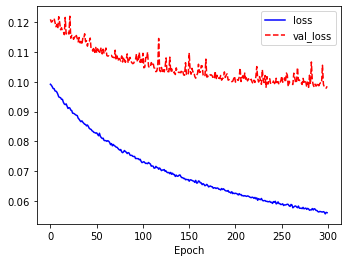

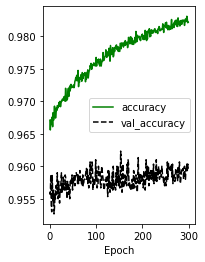

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label = 'loss')
plt.plot(history.history['val_loss'],'r--',label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label = 'accuracy')
plt.plot(history.history['val_accuracy'],'k--',label = 'val_accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [22]:
# 최종평가
model.evaluate(X_test,y_test)

118/118 [==============================] - 23s 192ms/step - loss: 0.1552 - accuracy: 0.9445


[0.15522964298725128, 0.9445333480834961]